In [1]:
!pip install torchvision.models.utils


ERROR: Could not find a version that satisfies the requirement torchvision.models.utils (from versions: none)
ERROR: No matching distribution found for torchvision.models.utils


In [2]:
torchvision.version 

NameError: name 'torchvision' is not defined

In [1]:
import os
import pathlib
import fastai.vision.all as fv
from IPython import display

In [2]:
import torchaudio
import fastai
import torchvision

import torch
import torch.nn as nn

import sys

import matplotlib.pyplot as plt
import IPython.display as ipd

from tqdm import tqdm

In [3]:
from torch.hub import load_state_dict_from_url

In [4]:
import torch.utils.model_zoo as model_zoo

model.load_state_dict(model_zoo.load_url(model_urls['resnet18']))

NameError: name 'model' is not defined

In [5]:
from torch.hub import *

In [6]:
from fastai.vision.all import *
from fastaudio.core.all import *
from fastaudio.augment.all import *
from fastaudio.ci import skip_if_ci

ModuleNotFoundError: No module named 'fastaudio'

In [6]:
import random
import fastaudio as fa

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


Despues de importar las librerias necesarias, y verificar que la gpu este disponible voy a importar el dataset que es un dataset que tiene tensorflow en su jupyter para mostrar como trabajar con audios, pero cambiare un poco las cosas ya que ellos no utilizan una red nuronal convolucional

In [8]:
DATASET_PATH = 'mini_speech_commands/mini_speech_commands'

data_dir = pathlib.Path(DATASET_PATH)

data_dir
#/home/gomosak/redes/mini_speech_commands/mini_speech_commands

Path('mini_speech_commands/mini_speech_commands')

In [9]:
files = fv.get_files(data_dir,recurse = True,followlinks=True)
files[1]

Path('mini_speech_commands/mini_speech_commands/left/dbb7723a_nohash_1.wav')

In [10]:
data_dir.ls()

(#8) [Path('mini_speech_commands/mini_speech_commands/left'),Path('mini_speech_commands/mini_speech_commands/go'),Path('mini_speech_commands/mini_speech_commands/up'),Path('mini_speech_commands/mini_speech_commands/yes'),Path('mini_speech_commands/mini_speech_commands/stop'),Path('mini_speech_commands/mini_speech_commands/right'),Path('mini_speech_commands/mini_speech_commands/down'),Path('mini_speech_commands/mini_speech_commands/no')]

In [11]:
ipd.Audio(files[-5])

Despues de importar los datos y mostrar uno, voy a hacer un random a la lista de archivos para que estos no esten en ningun orden, depues crear el set de train y el de test aunque esto no lo voy a utilizar pues cuando crea los batches prefiero usar el RandomSplittter

In [12]:
random.shuffle(files)
len(files)

8000

In [13]:
train_set = files[:7000]
test_set = files[7000:]

In [14]:
ipd.Audio(train_set[0])

In [15]:
waveform, sample_rate = torchaudio.load(test_set[0], normalize=True)
transform = torchaudio.transforms.Resample(sample_rate, sample_rate/10)
waveform = transform(waveform)

In [16]:
metadata = torchaudio.info(test_set[1])
print(metadata)

In [17]:
waveform.shape

torch.Size([1, 800])

Shape of waveform: torch.Size([1, 800])
Sample rate of waveform: 8000


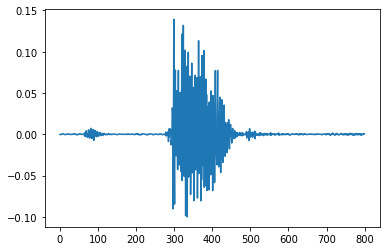

In [18]:
print("Shape of waveform: {}".format(waveform.size()))
print("Sample rate of waveform: {}".format(sample_rate))

plt.plot(waveform.t().numpy());

asi es como se ve el tensor del audio despues de "decodificarlo" pero esto no nos sirve como tal para pasarlo a la red neuronal por lo que cambiaremos eso, pero primero definire la funcion de obtener y

In [22]:
def get_y(archivo):
    return archivo.parent.name
get_y(files[0])

'yes'

In [24]:
labels = sorted(list(set(get_y(datapoint) for datapoint in train_set)))
labels

['down', 'go', 'left', 'no', 'right', 'stop', 'up', 'yes']

In [25]:
def to_waveform(file):
    wvf, sample_rate = torchaudio.load(file, normalize=True)
    return wvf,sample_rate

In [26]:
waveform_first = train_set[0]

waveform_first = to_waveform(waveform_first)[0]

ipd.Audio(waveform_first.numpy(), rate=sample_rate)
#display.Audio(train_set[-1])

In [27]:
waveform_first = train_set[0]

waveform_first = to_waveform(waveform_first)[0]

ipd.Audio(waveform_first.numpy(), rate=sample_rate)


waveform_second= train_set[1]

waveform_second = to_waveform(waveform_second)[0]



ipd.Audio(waveform_second.numpy(), rate=sample_rate)


In [28]:
waveform_last= train_set[-1]

waveform_last = to_waveform(waveform_last)[0]


ipd.Audio(waveform_last.numpy(), rate=sample_rate)

In [29]:
new_sample_rate = 8000
transform = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=new_sample_rate)
transformed = transform(waveform)

ipd.Audio(transformed.numpy(), rate=new_sample_rate)

Despues de algunas muestras de audio y de verificar que todos los audios tengan el mismo numro de muestras ya podemos pasarlo a batches, pero aqui me encontre con un problema algunos audios tenian una longitud diferente por lo que tenian mas o menos muestras por lo que decidi normalizarlos, para esto lo que hice es recorrer todos los audios, y resamplearlos a 8000 muesttas sin importar si eran mas grandes o mas pequeños asi el procesamiento seria mas rapido y no habria problema al crear los batches

In [30]:
 
waveform,  sample_rate= to_waveform(files[0])
waveform.shape

torch.Size([1, 8000])

In [ ]:
aux = 0
for i in files:
    waveform,  sample_rate= to_waveform(i)
    
    if waveform.shape[1] < 8000:
        print(i,waveform.shape,aux)
        a = tsms(i)
        print(a.shape)
    aux +=1

In [50]:
"""aux = 0
for i in files:
    waveform = tsms(i)
    torchaudio.save(filepath =files[aux],src = waveform,sample_rate=8000)
    aux +=1
"""

'aux = 0\nfor i in files:\n    waveform = tsms(i)\n    torchaudio.save(filepath =files[aux],src = waveform,sample_rate=8000)\n    aux +=1\n'

Para eso es la celda de arriba que despues decidi comentar para no ejecutarla por error, pero despues de esto todos los audios tientn la misma numero de muestras

In [31]:
waveform,  sample_rate= to_waveform(files[808])
print(waveform.shape,sample_rate)

torch.Size([1, 8000]) 8000


Shape of waveform: torch.Size([1, 8000])
Sample rate of waveform: 8000


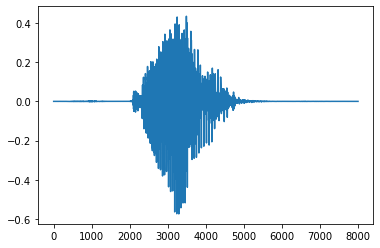

In [32]:
print("Shape of waveform: {}".format(waveform.size()))
print("Sample rate of waveform: {}".format(sample_rate))

plt.plot(waveform.t().numpy());

In [33]:
def tsms(file):
    waveform,  sample_rate= to_waveform(file)
    new_sample_rate = 8000
    ori_fre = waveform.shape[1]
    transform = torchaudio.transforms.Resample(orig_freq=  ori_fre,new_freq=new_sample_rate)
    transformed = transform(waveform)
    return transformed

In [34]:
waveform = tsms(files[11])
waveform

tensor([[-0.0011, -0.0025, -0.0031,  ...,  0.0071,  0.0067,  0.0063]])

Shape of waveform: torch.Size([1, 8000])
Sample rate of waveform: 8000


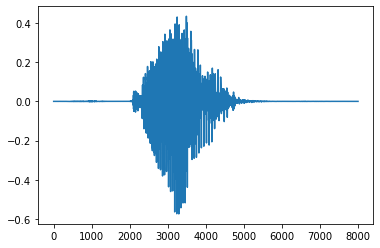

In [53]:
print("Shape of waveform: {}".format(waveform.size()))
print("Sample rate of waveform: {}".format(sample_rate))

plt.plot(waveform.t().numpy());

Y finalemente lo que se hace con a2s y cfg es convertir el audio en un espectograma o un tensor de tres dimensiones algo asi [1,8000,8000]

In [36]:
def load_data(folder, batch_size, new_sample_rate = 8000):

    cfg = AudioConfig.BasicMelSpectrogram(n_fft=512)
    a2s = AudioToSpec.from_cfg(cfg)
    
   
    
    
    data = fv.DataBlock(blocks =(AudioBlock, CategoryBlock),
                 get_items= get_audio_files,
                 splitter = fv.RandomSplitter(valid_pct=0.3),
                 get_y    = get_y,
                 batch_tfms = [a2s]
                )

    return data.dataloaders(folder, bs=batch_size)


In [37]:
data = load_data(DATASET_PATH,  batch_size = 256)

/home/gomosak/ds/lib/python3.8/site-packages/torchaudio/functional/functional.py:357: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (257) may be set too low.
  warnings.warn(


/home/gomosak/ds/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/gomosak/ds/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


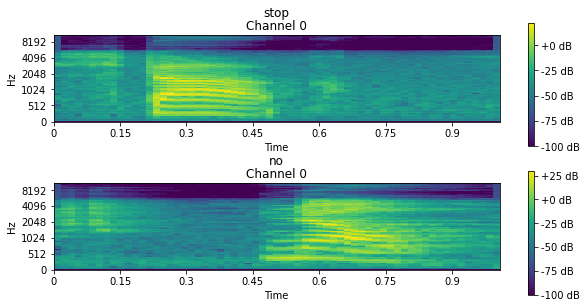

In [38]:
data.show_batch(figsize=(10, 5))

Como vemos en la imagen de arriba asi es como luce el espectograma y ahora si se lo podemos pasar a la red neuronal

In [41]:
x,y = data.one_batch()

In [42]:
y.shape

torch.Size([256])

Cuando creamos el lerner le decimos que el numero de entradas es uno ya que los audios solo tienen un canal, y eso es lo unico que cambia en comparacion con las imagenes que tienen 3

In [43]:
learner = fv.cnn_learner(data,fv.resnet18,n_in=1,metrics = fv.accuracy,
                        loss_func=CrossEntropyLossFlat())

SuggestedLRs(lr_min=0.025118863582611083, lr_steep=0.009120108559727669)

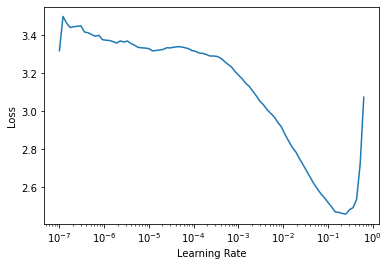

In [44]:
learner.lr_find()

In [45]:
learner.fit_one_cycle(8,lr_max=3e-2)

epoch,train_loss,valid_loss,accuracy,time
0,2.332999,3.032452,0.410417,00:28
1,1.593222,4.615208,0.319583,00:05
2,1.175910,1.666518,0.580417,00:05
3,0.890656,0.550741,0.813333,00:05
4,0.673496,0.497047,0.835833,00:05
5,0.511999,0.406541,0.864583,00:05
6,0.389183,0.382097,0.875000,00:05
7,0.304086,0.380127,0.875417,00:05


Se obtiene una accuracy decente despues de 8 epocas de entrenamiento 

In [46]:
learner.predict??

Signature: learner.predict(item, rm_type_tfms=None, with_input=False)
Docstring: Prediction on `item`, fully decoded, loss function decoded and probabilities
Source:   
    def predict(self, item, rm_type_tfms=None, with_input=False):
        dl = self.dls.test_dl([item], rm_type_tfms=rm_type_tfms, num_workers=0)
        inp,preds,_,dec_preds = self.get_preds(dl=dl, with_input=True, with_decoded=True)
        i = getattr(self.dls, 'n_inp', -1)
        inp = (inp,) if i==1 else tuplify(inp)
        dec = self.dls.decode_batch(inp + tuplify(dec_preds))[0]
        dec_inp,dec_targ = map(detuplify, [dec[:i],dec[i:]])
        res = dec_targ,dec_preds[0],preds[0]
        if with_input: res = (dec_inp,) + res
        return res
File:      ~/ds/lib/python3.8/site-packages/fastai/learner.py
Type:      method


In [47]:
learner.predict(files[0])

('yes',
 tensor(7),
 tensor([1.2348e-06, 2.4016e-06, 1.1722e-05, 5.0071e-05, 1.0991e-06, 1.1965e-05,
         1.0466e-06, 9.9992e-01]))

In [48]:
files[0]

Path('mini_speech_commands/mini_speech_commands/yes/d90b4138_nohash_0.wav')

In [49]:
for i in range(10):
    predict = learner.predict(files[i])
    label = get_y(files[i])

    waveform= files[i]

    waveform = to_waveform(waveform)[0]



    ipd.Audio(predict[2].numpy(), rate=sample_rate)

    print(predict,label)
ipd.Audio(predict[2].numpy(), rate=sample_rate)


('yes', tensor(7), tensor([1.2348e-06, 2.4016e-06, 1.1722e-05, 5.0071e-05, 1.0991e-06, 1.1965e-05,
        1.0466e-06, 9.9992e-01])) yes


('up', tensor(6), tensor([9.3326e-07, 4.1302e-05, 1.2893e-05, 7.2251e-06, 5.4491e-05, 1.0045e-04,
        9.9976e-01, 2.5688e-05])) up


('down', tensor(0), tensor([9.9859e-01, 6.9020e-04, 3.8493e-07, 7.1075e-04, 1.3532e-06, 3.8293e-07,
        8.2433e-07, 3.1181e-06])) down


('stop', tensor(5), tensor([0.1790, 0.0620, 0.0971, 0.0062, 0.1357, 0.4013, 0.0510, 0.0677])) down


('up', tensor(6), tensor([3.9569e-06, 1.7777e-04, 1.1209e-06, 1.0989e-06, 7.3397e-05, 7.8536e-05,
        9.9966e-01, 2.7284e-06])) up


('yes', tensor(7), tensor([2.2131e-06, 1.1615e-08, 3.1376e-06, 3.8959e-07, 2.2211e-08, 3.0689e-08,
        1.3907e-08, 9.9999e-01])) yes


('yes', tensor(7), tensor([6.9534e-09, 3.2035e-10, 3.3794e-07, 7.6078e-09, 1.4435e-10, 9.3353e-09,
        5.8660e-10, 1.0000e+00])) yes


('down', tensor(0), tensor([5.4890e-01, 2.0105e-02, 7.1351e-05, 5.2907e-04, 2.2577e-04, 4.2730e-01,
        7.1467e-04, 2.1583e-03])) down


('stop', tensor(5), tensor([7.3084e-04, 4.1729e-03, 7.3250e-04, 5.6091e-04, 6.3747e-05, 9.6409e-01,
        2.9074e-02, 5.7732e-04])) stop


('stop', tensor(5), tensor([5.3010e-06, 9.6386e-06, 2.8792e-06, 4.7989e-06, 1.2322e-06, 9.9949e-01,
        4.8002e-04, 9.6283e-06])) stop


Y finalmete algunas predicciones